In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [20]:
illiteracy=[9.5,49.2,1.0,11.2,9.8,60.0,50.2,51.2,0.6,1.0,8.5,6.1,9.8,1.
,42.2,77.2,18.7,22.8,8.5,43.9,1.0,1.0,1.5,10.8,11.9,3.4,0.4,3.1
,6.6,33.7,40.4,2.3,17.2,0.7,36.1,1.0,33.2,55.9,30.8,87.4,15.4,54.6
,5.1,1.1,10.2,19.8,0.0,40.7,57.2,59.9,3.1,55.7,22.8,10.9,34.7,32.2
,43.0,1.3,1.0,0.5,78.4,34.2,84.9,29.1,31.3,18.3,81.8,39.0,11.2,67.
,4.1,0.2,78.1,1.0,7.1,1.0,29.0,1.1,11.7,73.6,33.9,14.0,0.3,1.
,0.8,71.9,40.1,1.0,2.1,3.8,16.5,4.1,0.5,44.4,46.3,18.7,6.5,36.8
,18.6,11.1,22.1,71.1,1.0,0.0,0.9,0.7,45.5,8.4,0.0,3.8,8.5,2.
,1.0,58.9,0.3,1.0,14.0,47.0,4.1,2.2,7.2,0.3,1.5,50.5,1.3,0.6
,19.1,6.9,9.2,2.2,0.2,12.3,4.9,4.6,0.3,16.5,65.7,63.5,16.8,0.2
,1.8,9.6,15.2,14.4,3.3,10.6,61.3,10.9,32.2,9.3,11.6,20.7,6.5,6.7
,3.5,1.0,1.6,20.5,1.5,16.7,2.0,0.9]

In [21]:
fertility=[1.769,2.682,2.077,2.132,1.827,3.872,2.288,5.173,1.393,1.262,2.156,3.026
,2.033,1.324,2.816,5.211,2.1,1.781,1.822,5.908,1.881,1.852,1.39,2.281
,2.505,1.224,1.361,1.468,2.404,5.52,4.058,2.223,4.859,1.267,2.342,1.579
,6.254,2.334,3.961,6.505,2.53,2.823,2.498,2.248,2.508,3.04,1.854,4.22
,5.1,4.967,1.325,4.514,3.173,2.308,4.62,4.541,5.637,1.926,1.747,2.294
,5.841,5.455,7.069,2.859,4.018,2.513,5.405,5.737,3.363,4.89,1.385,1.505
,6.081,1.784,1.378,1.45,1.841,1.37,2.612,5.329,5.33,3.371,1.281,1.871
,2.153,5.378,4.45,1.46,1.436,1.612,3.19,2.752,3.35,4.01,4.166,2.642
,2.977,3.415,2.295,3.019,2.683,5.165,1.849,1.836,2.518,2.43,4.528,1.263
,1.885,1.943,1.899,1.442,1.953,4.697,1.582,2.025,1.841,5.011,1.212,1.502
,2.516,1.367,2.089,4.388,1.854,1.748,2.978,2.152,2.362,1.988,1.426,3.29
,3.264,1.436,1.393,2.822,4.969,5.659,3.24,1.693,1.647,2.36,1.792,3.45
,1.516,2.233,2.563,5.283,3.885,0.966,2.373,2.663,1.251,2.052,3.371,2.093
,2.0,3.883,3.852,3.718,1.732,3.928]

In [22]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)
#covariance/(std of x)*(std of y)
    # Return entry [0,1]
    return corr_mat[0,1]

def bootstrap_replicate_1d(data, func):
    bs_sample=np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

def ecdf(data):
    #Compute ECDF for a one-dimensional array of measurements.
    # Number of data points: n
    n =len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

observed: 0.8041324026815347
p-val = 0.0
a p-value of zero means the p-value is very low.  No one replicate was greater than the observed.


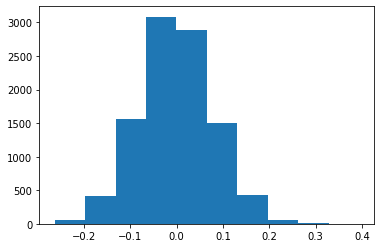

In [23]:
r_obs=pearson_r(illiteracy,fertility)
print("observed:",r_obs)
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

print("a p-value of zero means the p-value is very low.  No one replicate was greater than the observed.")

plt.hist(perm_replicates)
plt.show()

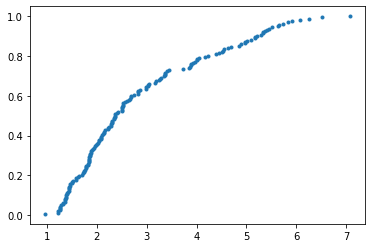

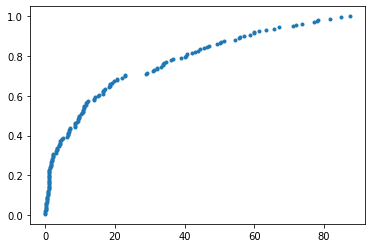

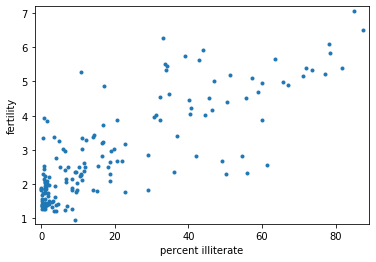

slope = 0.04979854809063426 children per woman / percent illiterate
intercept = 1.8880506106365562 children per woman


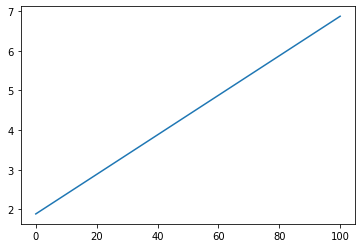

In [24]:
x_illiteracy,y_illiteracy=ecdf(illiteracy)
x_fertility,y_fertility=ecdf(fertility)
plt.plot(x_fertility, y_fertility, marker='.', linestyle='none')
plt.show()

plt.plot(x_illiteracy, y_illiteracy, marker='.', linestyle='none')
plt.show()

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')
plt.show()

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy,fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x,y)

# Draw the plot
plt.show()


In [25]:
diff_means=np.mean(illiteracy)-np.mean(fertility)
mean_count=np.mean(np.concatenate((illiteracy,fertility)))

illiteracy_shifted=illiteracy-np.mean(illiteracy)+mean_count
fertility_shifted=fertility -np.mean(fertility)+mean_count

bs_illiteracy = draw_bs_reps(illiteracy_shifted,
                               np.mean, size=10000)
bs_fertility = draw_bs_reps(fertility_shifted,
                               np.mean, size=10000)

bs_diff_replicates = bs_illiteracy - bs_fertility

# Compute and print p-value: p
p = np.sum(bs_diff_replicates >= np.mean(illiteracy) - np.mean(fertility)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0
